# Exercise 4 - Hodgkin & Huxley Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib import rcParams
% matplotlib inline

rcParams.update({'font.size': 21})

## Equations

### Constants

In [2]:
C_m = 1 #membrane capacitance, in uF/cm^2

g_Na = 120.0 #maximum conducances, in mS/cm^2
g_K  = 36.0
g_L  = 0.3

V_Na = 115 #Nernst reversal potentials, in mV
V_K  = -12
V_L  = 10.6
V_rest = -70


### Rate equations V in mV:
non-linear paramiters alfa and beta

In [3]:
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u ) - 1)
def alpha_h(u): return (0.07 * np.exp(-u / 20))

def beta_m(u):  return 4 * np.exp((-u) / 18)
def beta_n(u):  return 0.125 * np.exp((-u) / 80)
def beta_h(u):  return 1 / (np.exp(3 - 0.1 * u) + 1)

### Temperature correction

In [4]:
def temp_corr(T): return 3**(0.1*(T-6.3))  

## Time Constants and Steady State Values

### Time constants
τx(u)=[αx(u)+βx(u)] ^ −1

In [5]:
def tau_m(u): return (alpha_m(u) + beta_m(u))**(-1)
def tau_n(u): return (alpha_n(u) + beta_n(u))**(-1)
def tau_h(u): return (alpha_h(u) + beta_h(u))**(-1)

### Calculate time constants, for two temperature conditions

In [6]:
V = np.linspace(-100, 100, 1000)
temp1 = temp_corr(6.3)
Tau_M_6 = tau_m(V) / temp1
Tau_N_6 = tau_n(V) / temp1
Tau_H_6 = tau_h(V) / temp1

temp2 = temp_corr(28)
Tau_M_28 = tau_m(V) / temp2
Tau_N_28 = tau_n(V) / temp2
Tau_H_28 = tau_h(V) / temp2


### Plot time constans for two temp

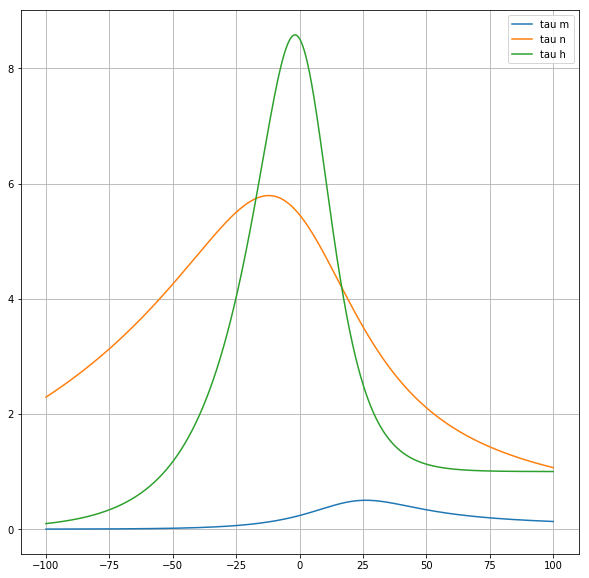

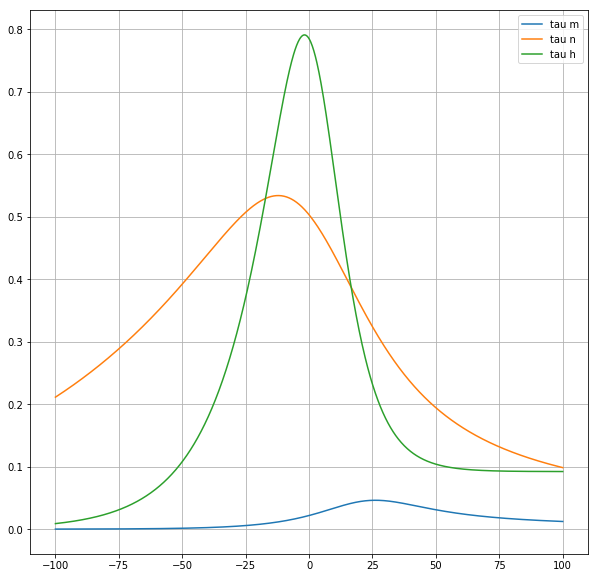

In [7]:
fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt0, = plt.plot(V, Tau_M_6, label='tau m');
plt1, = plt.plot(V, Tau_N_6, label='tau n');
plt2, = plt.plot(V, Tau_H_6, label='tau h');
plt.legend(loc=1, handles=[plt0, plt1, plt2])

fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt10, = plt.plot(V, Tau_M_28, label='tau m');
plt11, = plt.plot(V, Tau_N_28, label='tau n');
plt12, = plt.plot(V, Tau_H_28, label='tau h');
plt.legend(loc=1, handles=[plt10, plt11, plt12])

In [8]:
def m_ss(u): return alpha_m(u) / (alpha_m(u) + beta_m(u))
def n_ss(u): return alpha_n(u) / (alpha_n(u) + beta_n(u))
def h_ss(u): return alpha_h(u) / (alpha_h(u) + beta_h(u))

In [9]:
V = np.linspace(-100, 100, 1000)
M_6 = m_ss(V)
N_6 = n_ss(V)
H_6 = h_ss(V)

M_28 = m_ss(V) 
N_28 = n_ss(V) 
H_28 = h_ss(V) 

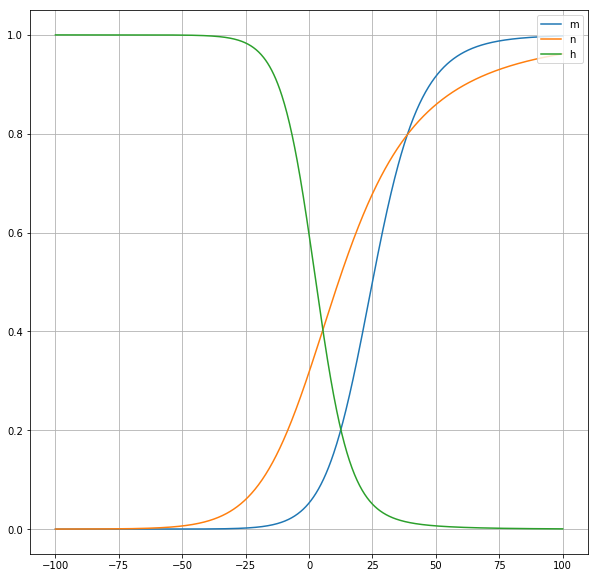

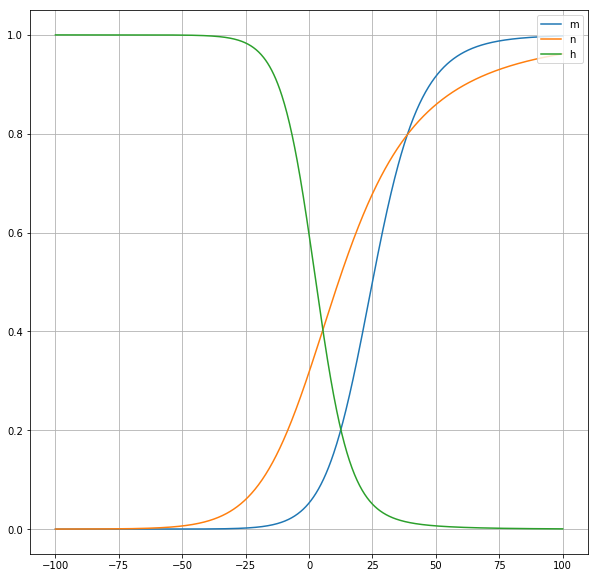

In [10]:
fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt0, = plt.plot(V, M_6, label='m');
plt1, = plt.plot(V, N_6, label='n');
plt2, = plt.plot(V, H_6, label='h');
plt.legend(loc=1, handles=[plt0, plt1, plt2])

fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt0, = plt.plot(V, M_28, label='m');
plt1, = plt.plot(V, N_28, label='n');
plt2, = plt.plot(V, H_28, label='h');
plt.legend(loc=1, handles=[plt0, plt1, plt2])

## Hodgkin & Huxley Neuro Model
implement a function that calculates the ionic current density i_ion, 
use the exponential-euler solver



### Ionic currents

In [11]:
def I_Na(u, m, h): return g_Na * (m**3 * h) * (u - V_Na)  #sodium channel
def I_K (u, n   ): return g_K  * (n**4    ) * (u - V_K)   #potas
def I_L (u      ): return g_L               * (u - V_L)

def i_ion(I_Na, I_K, I_L): return I_Na + I_K + I_L
def dv_dt(i_ion, i_stim): return 1/c * (-i_ion + i_stimulus)

In [12]:
def temp_corr(T): return 3**(0.1*(T-6.3))  

def dm_du(m, u): return alpha_m(u) * (1 - m) - beta_m(u) * m
def dn_du(n, u): return alpha_n(u) * (1 - n) - beta_n(u) * n
def dh_du(h, u): return alpha_h(u) * (1 - h) - beta_h(u) * h

# C_m = 1 * 10e-6
def du_du(u, m, n, h, I,): return (I_Na(u, m, h) + I_K(u, n) + I_L(u) - I)/ -C_m
def dv_dt(u, m, n, h, I,): return 1/C_m * [I_Na(u, m, h) + I_K(u, n) + I_L(u)]

## Test

In [13]:
def hh_model(temp, T, dt, I):
    V_rest = 0
    t = np.linspace(0, T, int(T/dt))
    M = np.zeros_like(t)
    N = np.zeros_like(t)
    H = np.zeros_like(t)
    U = np.zeros_like(t)
    M[0], N[0], H[0] = m_ss(V_rest), n_ss(V_rest), h_ss(V_rest)
    U[0] = V_rest
    k = temp_corr(temp)
    
    for n in range(0, len(I)-1):
        M[n+1] = M[n] + dm_du(M[n], U[n]) * k * dt 
        N[n+1] = N[n] + dn_du(N[n], U[n]) * k * dt
        H[n+1] = H[n] + dh_du(H[n], U[n]) * k * dt
        
        U[n+1] = U[n] + du_du(U[n], M[n+1], N[n+1], H[n+1], I[n]) * dt
    return U, M, N, H

## ADD STORAGE for I_Na and so on to plot

In [21]:
## TODO: add exponential euler instead of regular one to M, N, H 

def hh_model_exp(temp, T, dt, I):
    V_rest = 0
    t = np.linspace(0, T, int(T/dt))
    M = np.zeros_like(t)
    N = np.zeros_like(t)
    H = np.zeros_like(t)
    U = np.zeros_like(t)
    
    INa = np.zeros_like(t)
    IK  = np.zeros_like(t)
    IL  = np.zeros_like(t)
    
    M[0], N[0], H[0] = m_ss(V_rest), n_ss(V_rest), h_ss(V_rest)
    U[0] = V_rest
    k = temp_corr(temp)
    
    for n in range(0, len(I)-1):
        u = U[n]
        A_m = -1 * k * (alpha_m(u) + beta_m(u))
        A_n = -1 * k * (alpha_n(u) + beta_n(u))
        A_h = -1 * k * (alpha_h(u) + beta_h(u))
        B_m = k * alpha_m(u)
        B_n = k * alpha_n(u)
        B_h = k * alpha_h(u)
      
        INa[n] = g_Na * (M[n]**3 * H[n]) * (u - V_Na)  #sodium channel
        IK[n]  = g_K  * (N[n]**4       ) * (u - V_K)   #potas
        IL[n]  = g_L                     * (u - V_L)

        M[n+1] = M[n] * np.exp(A_m * dt) + B_m/A_m * (np.exp(A_m * dt)-1)
        N[n+1] = N[n] * np.exp(A_n * dt) + B_n/A_n * (np.exp(A_n * dt)-1)
        H[n+1] = H[n] * np.exp(A_h * dt) + B_h/A_h * (np.exp(A_h * dt)-1)
        
        U[n+1] = U[n] + du_du(U[n], M[n+1], N[n+1], H[n+1], I[n]) * dt
#     return U, M, N, H
    return U, M, N, H, INa, IK, IL



In [15]:
def exp_euler(v0, t0, f, dt, T):
#     f = A(t) V(t) + (B(V,t))
#     f = 1 - V - t
    t = np.linspace(t0, T, int((T-t0)/(dt)))
    V = np.zeros(len(t))
    V[0] = v0
    for i in np.arange(1, len(t)):
        A = -1
        B = 1 - t[i-1]
        V[i] = V[i-1] * np.exp(A*dt) + B/A * (np.exp(A*dt) - 1) 
        
    return V, t

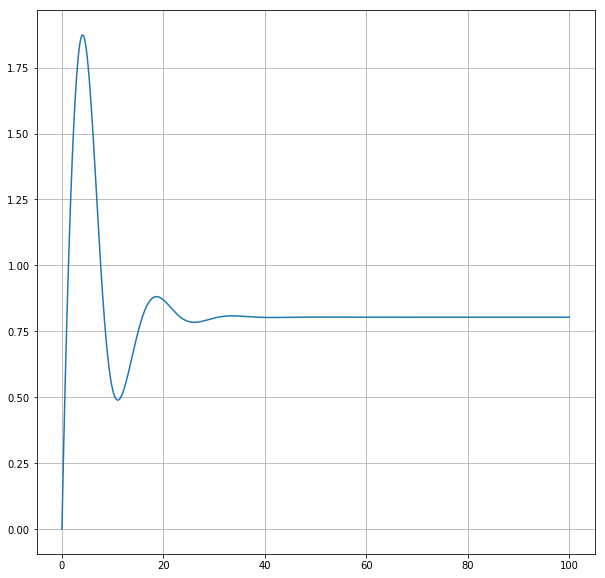

In [22]:
l = 100/0.01
t = np.linspace(0, 100, int(l))
I = np.repeat(1, int(l))
U, M, N, H, INa, IK, IL = hh_model_exp(6.3, 100, 0.01, I)
# U, M, N, H = hh_model_exp(6.3, 100, 0.01, I)


fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, U);


### Exponential Euler Solver

## Current Input

In [17]:
l = 100/0.01
t = np.linspace(0, 100, int(l))
I1 = np.repeat(0, int(l))

I1[0:499] = 1
I1[1499:2000] = 2
I1[3000:3499] = 3
I1[4499:5000] = 4
I1[6000:6499] = 5

I2 = np.repeat(0, int(l))
I2[0:499] = 2
I2[1499:2000] = 4
I2[3000:3499] = 8
I2[4499:5000] = 16
I2[6000:6499] = 32


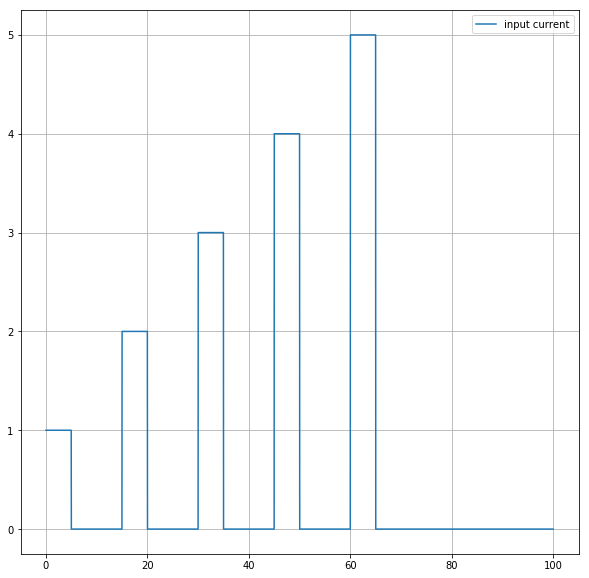

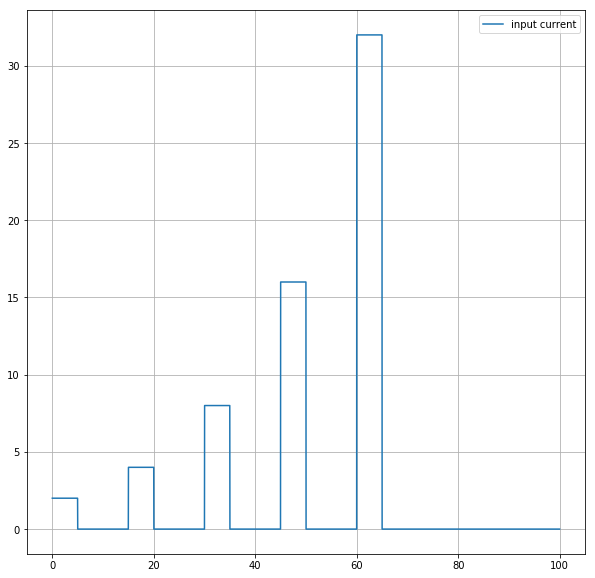

In [18]:
fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, I1, label='input current');
plt.legend()

fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, I2, label='input current');
plt.legend()

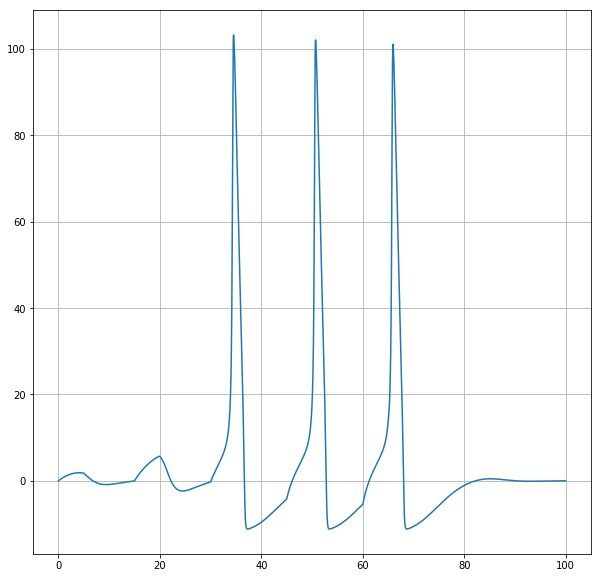

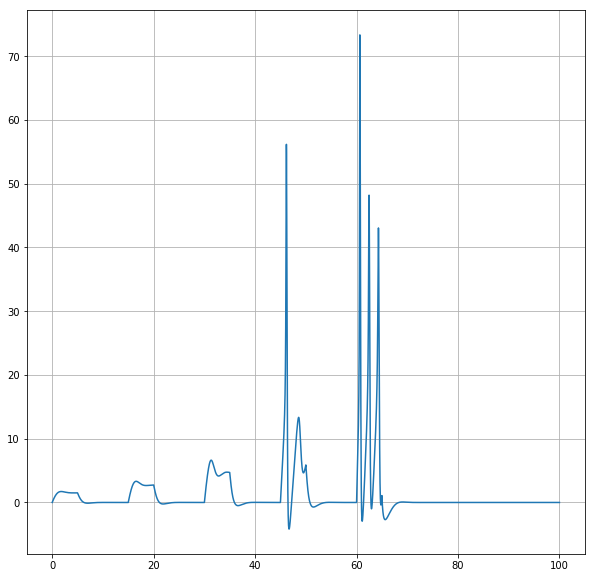

In [23]:
U1, M1, N1, H1, I_Na1, I_K1, I_L1 = hh_model_exp(6.3, 100, 0.01, I1)

fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, U1);

U2, M2, N2, H2, I_Na2, I_K2, I_L2 = hh_model_exp(28, 100, 0.01, I2)

fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, U2);

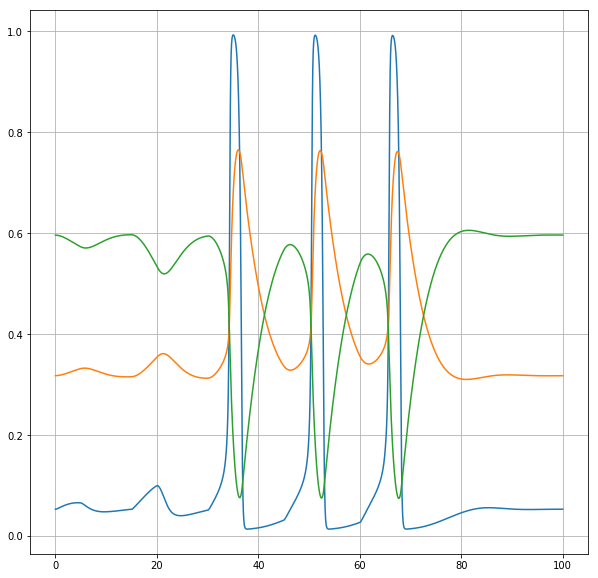

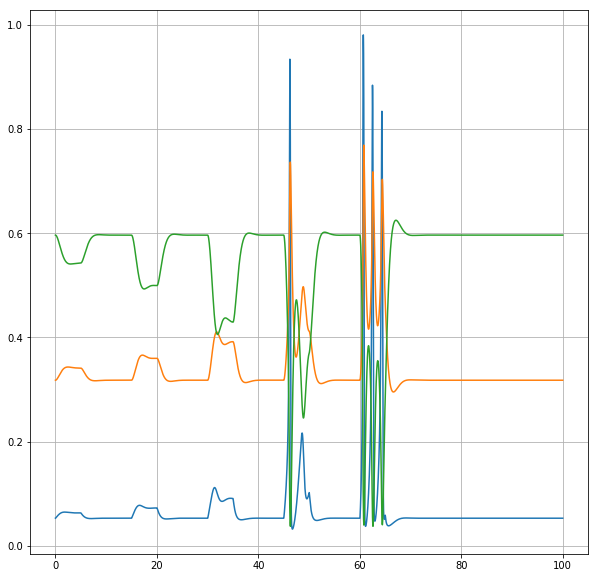

In [25]:
fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, M1);
plt.plot(t, N1);
plt.plot(t, H1);

fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, M2);
plt.plot(t, N2);
plt.plot(t, H2);

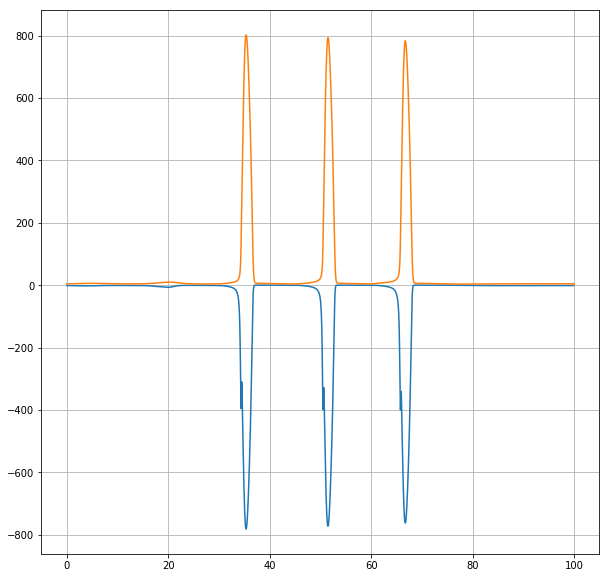

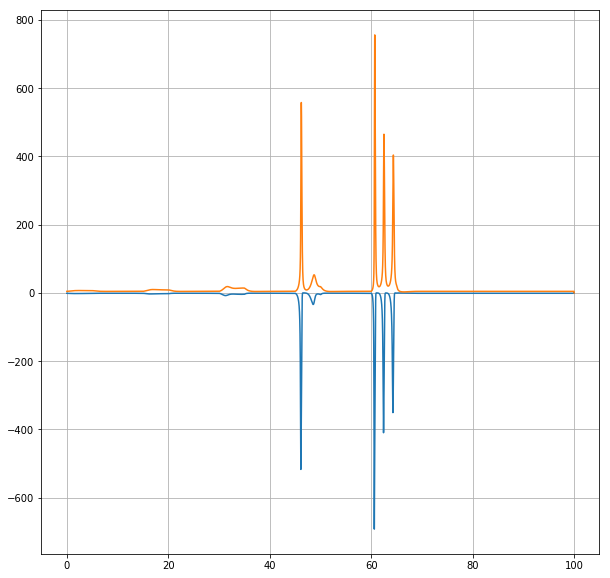

In [27]:
fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, I_Na1);
plt.plot(t, I_K1);

fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(t, I_Na2);
plt.plot(t, I_K2);


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(U, I_Na1);
plt.plot(U, I_K1);
plt.plot(U, I_L1);

fig, ax = plt.subplots(figsize=(10, 10));
ax.grid()
plt.plot(U, I_Na2);
plt.plot(U, I_K2);
plt.plot(U, I_L2);